
# Data Analysis Case – Correlation Study

**Author:** Tayná Alves  
**Created on:** 2025-11-09  
**Repository:** taynaalvesdev  
**Purpose:** Portfolio  
**Description:** Script for data ingestion, transformation and analysis.

---

## 📌 Project Overview

This notebook documents a data analysis case focused on **correlation analysis** between key variables.
The goal is to demonstrate good practices in:

- Data organization
- Exploratory analysis
- Clear documentation
- Reproducible analytical workflow

This project is structured and documented for publication on **GitHub** as part of data portfolio.


## 📌 Libraries

- Pandas
- NumPy
- Matplotlib / Seaborn
- Textwrap
- Os

## 1. Library Installation & Imports

In [20]:
#Remove the "#" if you need to install any of the libraries described

#%pip install numpy
#%pip install pandas
#%pip install Matplotlib
#%pip install seaborn

## 2. Data Loading

In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import os
import textwrap

# Path of the tables
file_path = "Tables_Case.xlsx"

# Reading the tabs
bets = pd.read_excel(file_path, sheet_name='BETS')
feedback = pd.read_excel(file_path, sheet_name='User_Feedback')
users = pd.read_excel(file_path, sheet_name='User')

print("✅ Tables loaded successfully!")

✅ Tables loaded successfully!


## 3. Data Cleaning & Feature Engineering

In [23]:
# Date column conversion

DATE_COLUMNS = {
    'users': ['registration_time', 'first_deposit_time'],
    'bets': ['bet_time', 'transaction_time'],
    'feedback': ['feedback_time']
}

for col in DATE_COLUMNS['users']:
    if col in users.columns:
        users[col] = pd.to_datetime(users[col], errors='coerce')

for col in DATE_COLUMNS['bets']:
    if col in bets.columns:
        bets[col] = pd.to_datetime(bets[col], errors='coerce')

for col in DATE_COLUMNS['feedback']:
    if col in feedback.columns:
        feedback[col] = pd.to_datetime(feedback[col], errors='coerce')

# Time until first deposit (minutes)
users['time_until_first_deposit'] = (
    users['first_deposit_time'] - users['registration_time']
).dt.total_seconds() / 60

# Users without deposit
users['time_until_first_deposit'] = users['time_until_first_deposit'].fillna(0)

# Transaction time to numeric
bets['transaction_time_sec'] = pd.to_numeric(
    bets['transaction_time_sec'],
    errors='coerce'
)

# Merge tables
merged_df = (
    bets.merge(users, on='user_id', how='left')
        .merge(feedback, on='user_id', how='left')
)

# Feedback flag
merged_df['feedback_flag'] = merged_df['feedback_type'].map({
    'Usability': 1,
    'Transaction': 0
})

# Fill NaN only for numeric columns
num_cols = merged_df.select_dtypes(include='number').columns
merged_df[num_cols] = merged_df[num_cols].fillna(0)

# Checkpoint
print("✅ Data processing OK" if 'merged_df' in globals() else "❌ Data processing FAILED")

✅ Data processing OK


C:\Users\Temp\AppData\Local\Temp\ipykernel_5792\3151762334.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bets[col] = pd.to_datetime(bets[col], errors='coerce')


## 4. Exploratory Data Analysis

In [24]:
# Correlation Matrix

# Select only numeric columns
numeric_cols = merged_df.select_dtypes(include='number').drop(
    columns=['bet_id', 'user_id'],
    errors='ignore'
)

# Remove columns that don't make sense in the correlation
cols_to_exclude = [
    col for col in numeric_cols.columns
    if ('time' in col and col != 'transaction_time_sec') or col == 'feedback_id'
]
numeric_cols = numeric_cols.drop(columns=cols_to_exclude, errors='ignore')

# Calculate correlation matrix
corr_matrix = (
    numeric_cols
    .corr()
    .round(2)
    .dropna(how='all')
    .dropna(axis=1, how='all')
)

print(" CORRELATION MATRIX ")
print(corr_matrix)

# Checkpoint
assert not corr_matrix.empty
print("✅ Correlation matrix OK")

 CORRELATION MATRIX 
                      bet_amount  odds  transaction_time_sec  total_deposit  \
bet_amount                  1.00 -0.62                  0.23          -0.67   
odds                       -0.62  1.00                 -0.64           0.77   
transaction_time_sec        0.23 -0.64                  1.00          -0.79   
total_deposit              -0.67  0.77                 -0.79           1.00   
feed back_id                0.10 -0.23                  0.67          -0.29   
feedback_flag               0.36 -0.82                  0.53          -0.71   

                      feed back_id  feedback_flag  
bet_amount                    0.10           0.36  
odds                         -0.23          -0.82  
transaction_time_sec          0.67           0.53  
total_deposit                -0.29          -0.71  
feed back_id                  1.00          -0.21  
feedback_flag                -0.21           1.00  
✅ Correlation matrix OK


## 5. Interpretation & Insights

In [25]:
# Correlation insights

corr_insights = []

threshold = 0.6

for col in corr_matrix.columns:
    for idx in corr_matrix.index:
        if col != idx:
            corr_value = corr_matrix.loc[idx, col]
            if abs(corr_value) >= threshold:
                corr_insights.append(
                    f"Strong correlation between '{idx}' and '{col}': {corr_value}"
                )

# Insights

assert 'corr_insights' in globals()

corr_insights = list(dict.fromkeys(corr_insights))

print("\n RELEVANT INSIGHTS ")
for i, insight in enumerate(corr_insights, 1):
    print(f"{i}. {insight}")

print("✅ Insights OK")


 RELEVANT INSIGHTS 
1. Strong correlation between 'odds' and 'bet_amount': -0.62
2. Strong correlation between 'total_deposit' and 'bet_amount': -0.67
3. Strong correlation between 'bet_amount' and 'odds': -0.62
4. Strong correlation between 'transaction_time_sec' and 'odds': -0.64
5. Strong correlation between 'total_deposit' and 'odds': 0.77
6. Strong correlation between 'feedback_flag' and 'odds': -0.82
7. Strong correlation between 'odds' and 'transaction_time_sec': -0.64
8. Strong correlation between 'total_deposit' and 'transaction_time_sec': -0.79
9. Strong correlation between 'feed back_id' and 'transaction_time_sec': 0.67
10. Strong correlation between 'bet_amount' and 'total_deposit': -0.67
11. Strong correlation between 'odds' and 'total_deposit': 0.77
12. Strong correlation between 'transaction_time_sec' and 'total_deposit': -0.79
13. Strong correlation between 'feedback_flag' and 'total_deposit': -0.71
14. Strong correlation between 'transaction_time_sec' and 'feed back_i

In [26]:
# Interpretation

print("""
📊 INTERPRETATION:
- Positive correlation: when one variable increases, the other tends to increase.
- Negative correlation: when one variable increases, the other tends to decrease.
- 'time_until_first_deposit': the higher this value, the slower the first deposit.
- Users without deposits tend to report more usability-related issues.
- High-odds bets show a relationship with slower or failed transactions.
- 'Transaction' feedbacks are associated with delayed transaction times.
""")


📊 INTERPRETATION:
- Positive correlation: when one variable increases, the other tends to increase.
- Negative correlation: when one variable increases, the other tends to decrease.
- 'time_until_first_deposit': the higher this value, the slower the first deposit.
- Users without deposits tend to report more usability-related issues.
- High-odds bets show a relationship with slower or failed transactions.
- 'Transaction' feedbacks are associated with delayed transaction times.



## 6. Data Visualization

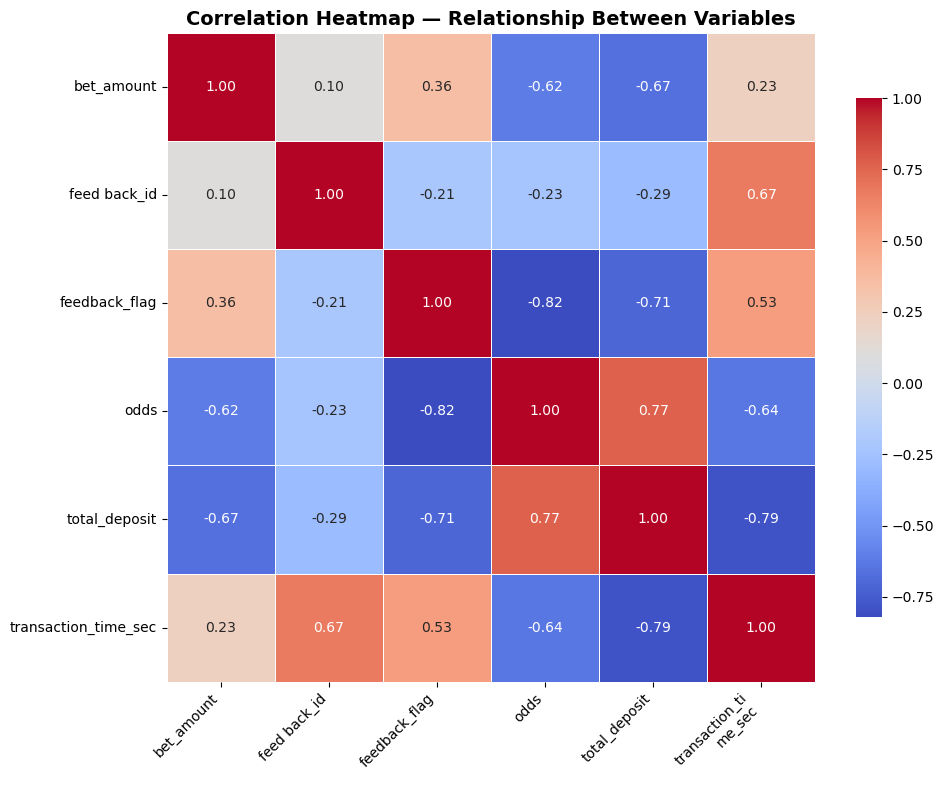

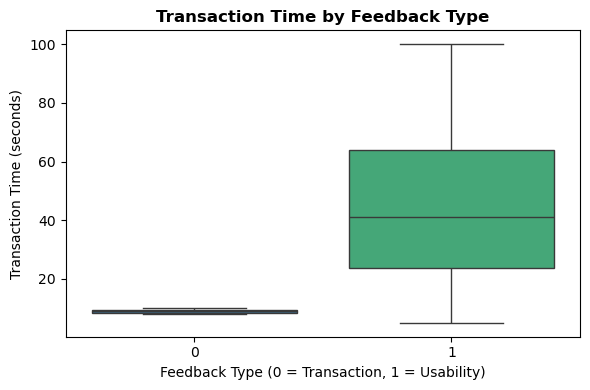

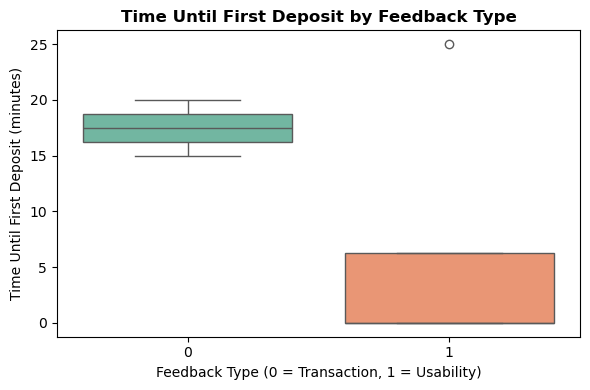

In [34]:
# Visualizations

# Output directory for charts
charts_dir = os.path.join(os.path.expanduser("~"), "Charts")
os.makedirs(charts_dir, exist_ok=True)

# Transaction time conversion to numeric (seconds)
merged_df['transaction_time_num'] = (
    pd.to_datetime(merged_df['transaction_time'], errors='coerce')
    .astype('int64') / 1e9
)

# Correlation matrix preparation
numeric_cols = merged_df.select_dtypes(include=['number']).drop(
    columns=['bet_id', 'user_id'],
    errors='ignore'
)

# Remove non-meaningful columns for correlation analysis
cols_to_exclude = [
    col for col in numeric_cols.columns
    if ('time' in col and col != 'transaction_time_sec') or col == 'feedback_id'
]
numeric_cols = numeric_cols.drop(columns=cols_to_exclude, errors='ignore')

corr_matrix = (
    numeric_cols
    .corr()
    .round(2)
    .dropna(how='all')
    .dropna(axis=1, how='all')
)

# Keep diagonal visible and variables ordered
corr_matrix = corr_matrix.reindex(
    index=sorted(corr_matrix.columns),
    columns=sorted(corr_matrix.columns)
)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

# Wrap long labels only on X-axis
wrapped_labels = [
    "\n".join(textwrap.wrap(label, width=14))
    for label in corr_matrix.columns
]

# Chart 1 — Correlation Heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)

ax.set_xticklabels(wrapped_labels, rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.title(
    'Correlation Heatmap — Relationship Between Variables',
    fontsize=14,
    fontweight='bold'
)
plt.tight_layout()
plt.savefig(
    os.path.join(charts_dir, "correlation_heatmap.png"),
    dpi=300,
    bbox_inches='tight',
    transparent=True
)
plt.show()

# Chart 2 — Transaction Time by Feedback Type
plt.figure(figsize=(6, 4))

sns.boxplot(
    x='feedback_flag',
    y='transaction_time_sec',
    hue='feedback_flag',
    data=merged_df,
    palette='viridis',
    legend=False
)

plt.title('Transaction Time by Feedback Type', fontsize=12, fontweight='bold')
plt.xlabel('Feedback Type (0 = Transaction, 1 = Usability)')
plt.ylabel('Transaction Time (seconds)')

plt.tight_layout()
plt.savefig(
    os.path.join(charts_dir, "transaction_time_by_feedback.png"),
    dpi=300,
    bbox_inches='tight',
    transparent=True
)
plt.show()

# Chart 3 — Time Until First Deposit by Feedback Type
plt.figure(figsize=(6, 4))

sns.boxplot(
    x='feedback_flag',
    y='time_until_first_deposit',
    hue='feedback_flag',
    data=merged_df,
    palette='Set2',
    legend=False
)

plt.title('Time Until First Deposit by Feedback Type', fontsize=12, fontweight='bold')
plt.xlabel('Feedback Type (0 = Transaction, 1 = Usability)')
plt.ylabel('Time Until First Deposit (minutes)')

plt.tight_layout()
plt.savefig(
    os.path.join(charts_dir, "time_until_first_deposit_by_feedback.png"),
    dpi=300,
    bbox_inches='tight',
    transparent=True
)
plt.show()